In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
frames = []
for experiment_num in range(1, 7):
    df = pd.read_json(path_or_buf=f'experiment_{experiment_num}/output.json', orient='columns')
    df = df.drop(columns=['counter'])
#     df = df.rename(columns={'0':f'{experiment_num}'})
    df = df.T
    df['experiment_num'] = experiment_num
    frames.append(df)
df = pd.concat(frames)
df['down_res'] = 1/(2**(df['experiment_num']-1))
if not os.path.isdir('post_processing'):
    os.mkdir('post_processing')
df.to_csv('post_processing/compiled_output.csv', index=False)
df

,total_training_time,total_epochs,total_prediction_time,total_prediction_samples,max_l2_error,min_l2_error,mean_l2_error,diamond_ar_1p25_total_prediction_time,diamond_ar_1p25_total_prediction_samples,diamond_ar_1p25_max_l2_error,...,cylinder_half_max_l2_error,cylinder_half_min_l2_error,cylinder_half_mean_l2_error,cylinder_half_flipped_total_prediction_time,cylinder_half_flipped_total_prediction_samples,cylinder_half_flipped_max_l2_error,cylinder_half_flipped_min_l2_error,cylinder_half_flipped_mean_l2_error,experiment_num,down_res
0,838.751837,578.0,2.321757,80.0,0.004001,0.003459,0.003669,0.451224,400.0,0.005041,...,0.006462,0.005257,0.005789,0.532443,400.0,0.007252,0.004544,0.005266,1,1.00000
1,309.011364,219.0,0.248447,80.0,0.006649,0.006096,0.006397,0.560644,400.0,0.008049,...,0.011858,0.008687,0.009588,0.463195,400.0,0.014040,0.007394,0.009276,1,1.00000
0,529.351108,375.0,0.256817,80.0,0.011028,0.010547,0.010766,0.525378,400.0,0.011577,...,0.015280,0.011602,0.012809,0.459607,400.0,0.014960,0.011211,0.012559,2,0.50000
1,525.214286,373.0,0.260153,80.0,0.006342,0.005665,0.006010,0.509999,400.0,0.008061,...,0.010423,0.008023,0.009047,0.432253,400.0,0.009648,0.007420,0.008223,2,0.50000
0,884.540445,628.0,0.273274,80.0,0.007869,0.006760,0.007349,0.466708,400.0,0.012003,...,0.017340,0.011251,0.013457,0.463278,400.0,0.016890,0.010577,0.013129,3,0.25000
1,644.222132,456.0,0.254184,80.0,0.009013,0.007760,0.008349,0.548347,400.0,0.012689,...,0.018002,0.011449,0.014277,0.455115,400.0,0.018238,0.010819,0.013560,3,0.25000
0,622.544069,429.0,0.292696,80.0,0.017808,0.016000,0.016788,0.555621,400.0,0.029108,...,0.045729,0.030571,0.035875,0.529799,400.0,0.039317,0.026959,0.032347,4,0.12500
1,475.189059,338.0,0.316822,80.0,0.014867,0.012938,0.013838,0.515193,400.0,0.027178,...,0.064384,0.029913,0.043867,0.435583,400.0,0.066100,0.027623,0.048833,4,0.12500
0,524.636731,373.0,0.321524,80.0,0.028349,0.024334,0.026137,0.537165,400.0,0.138010,...,0.191807,0.081347,0.134216,0.448847,400.0,0.165969,0.081833,0.122218,5,0.06250
1,558.037961,396.0,0.249781,80.0,0.023176,0.019465,0.021063,0.531775,400.0,0.135097,...,0.210443,0.084244,0.134990,0.458302,400.0,0.187956,0.086405,0.131564,5,0.06250


In [6]:
print(df.columns)

Index(['total_training_time', 'total_epochs', 'total_prediction_time',
       'total_prediction_samples', 'max_l2_error', 'min_l2_error',
       'mean_l2_error', 'diamond_ar_1p25_total_prediction_time',
       'diamond_ar_1p25_total_prediction_samples',
       'diamond_ar_1p25_max_l2_error', 'diamond_ar_1p25_min_l2_error',
       'diamond_ar_1p25_mean_l2_error', 'diamond_ar_1p5_total_prediction_time',
       'diamond_ar_1p5_total_prediction_samples',
       'diamond_ar_1p5_max_l2_error', 'diamond_ar_1p5_min_l2_error',
       'diamond_ar_1p5_mean_l2_error', 'diamond_ar_1p66_total_prediction_time',
       'diamond_ar_1p66_total_prediction_samples',
       'diamond_ar_1p66_max_l2_error', 'diamond_ar_1p66_min_l2_error',
       'diamond_ar_1p66_mean_l2_error', 'diamond_ar_2p0_total_prediction_time',
       'diamond_ar_2p0_total_prediction_samples',
       'diamond_ar_2p0_max_l2_error', 'diamond_ar_2p0_min_l2_error',
       'diamond_ar_2p0_mean_l2_error',
       'triangle_ar_1p25_total_predi

In [7]:
df_asc = df.filter(like='0', axis=0)
df_dsc = df.filter(like='1', axis=0)

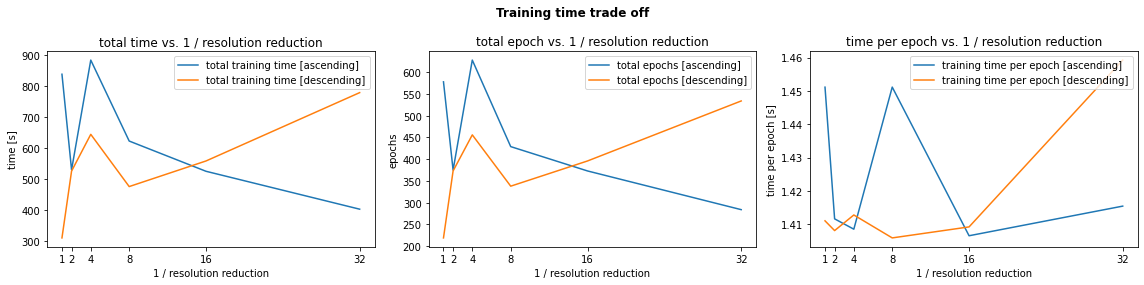

In [47]:
fig, axs = plt.subplots(1,3, figsize=(16,4), facecolor='white', edgecolor='k')
axs[0].plot(1/df_asc.down_res, df_asc.total_training_time, label='total training time [ascending]')
axs[0].plot(1/df_dsc.down_res, df_dsc.total_training_time, label='total training time [descending]')
axs[0].set_ylabel('time [s]')
axs[0].set_xlabel('1 / resolution reduction')
axs[0].set_xticks(1/df_asc.filter(like='0', axis=0).down_res)
axs[0].set_title('total time vs. 1 / resolution reduction')
axs[0].legend()

axs[1].plot(1/df_asc.down_res, df_asc.total_epochs, label='total epochs [ascending]')
axs[1].plot(1/df_dsc.down_res, df_dsc.total_epochs, label='total epochs [descending]')
axs[1].set_ylabel('epochs')
axs[1].set_xlabel('1 / resolution reduction')
axs[1].set_xticks(1/df_asc.filter(like='0', axis=0).down_res)
axs[1].set_title('total epoch vs. 1 / resolution reduction')
axs[1].legend()

axs[2].plot(1/df_asc.down_res, df_asc.total_training_time/df_asc.total_epochs, label='training time per epoch [ascending]')
axs[2].plot(1/df_dsc.down_res, df_dsc.total_training_time/df_dsc.total_epochs, label='training time per epoch [descending]')
axs[2].set_ylabel('time per epoch [s]')
axs[2].set_xlabel('1 / resolution reduction')
axs[2].set_xticks(1/df_asc.filter(like='0', axis=0).down_res)
axs[2].set_title('time per epoch vs. 1 / resolution reduction')
axs[2].legend()

fig.suptitle('Training time trade off', fontweight='heavy')
fig.tight_layout()

plt.savefig('post_processing/training_time_comparison.png', facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()

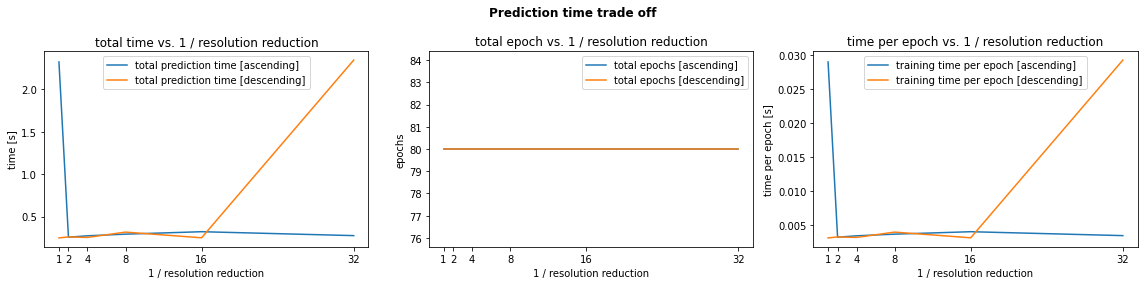

In [48]:
fig, axs = plt.subplots(1,3, figsize=(16,4), facecolor='white', edgecolor='k')
axs[0].plot(1/df_asc.down_res, df_asc.total_prediction_time, label='total prediction time [ascending]')
axs[0].plot(1/df_dsc.down_res, df_dsc.total_prediction_time, label='total prediction time [descending]')
axs[0].set_ylabel('time [s]')
axs[0].set_xlabel('1 / resolution reduction')
axs[0].set_xticks(1/df_asc.filter(like='0', axis=0).down_res)
axs[0].set_title('total time vs. 1 / resolution reduction')
axs[0].legend()

axs[1].plot(1/df_asc.down_res, df_asc.total_prediction_samples, label='total epochs [ascending]')
axs[1].plot(1/df_dsc.down_res, df_dsc.total_prediction_samples, label='total epochs [descending]')
axs[1].set_ylabel('epochs')
axs[1].set_xlabel('1 / resolution reduction')
axs[1].set_xticks(1/df_asc.filter(like='0', axis=0).down_res)
axs[1].set_title('total epoch vs. 1 / resolution reduction')
axs[1].legend()

axs[2].plot(1/df_asc.down_res, df_asc.total_prediction_time/df_asc.total_prediction_samples, label='training time per epoch [ascending]')
axs[2].plot(1/df_dsc.down_res, df_dsc.total_prediction_time/df_dsc.total_prediction_samples, label='training time per epoch [descending]')
axs[2].set_ylabel('time per epoch [s]')
axs[2].set_xlabel('1 / resolution reduction')
axs[2].set_xticks(1/df_asc.filter(like='0', axis=0).down_res)
axs[2].set_title('time per epoch vs. 1 / resolution reduction')
axs[2].legend()

fig.suptitle('Prediction time trade off', fontweight='heavy')
fig.tight_layout()

plt.savefig('post_processing/prediction_time_comparison.png', facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()

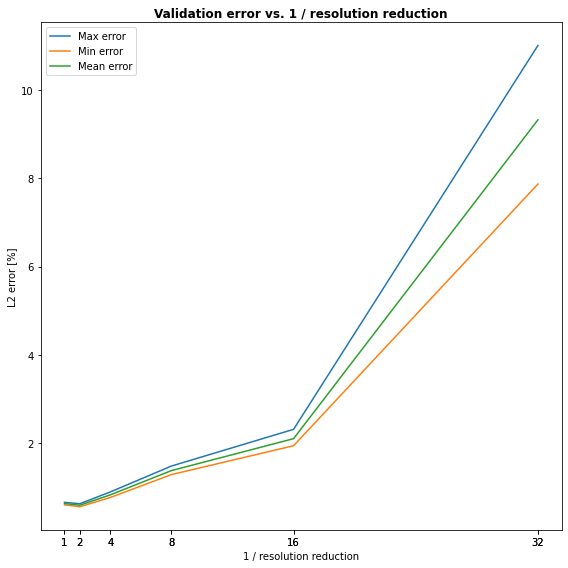

In [8]:
fig, axs = plt.subplots(1,1, figsize=(8,8), facecolor='white', edgecolor='k')
axs.plot(1/df_asc.down_res, df_asc.max_l2_error*100, label='Max error')
axs.plot(1/df_asc.down_res, df_asc.min_l2_error*100, label='Min error')
axs.plot(1/df_asc.down_res, df_asc.mean_l2_error*100, label='Mean error')

# axs.plot(1/df_dsc.down_res, df_dsc.max_l2_error*100, label='Max error')
# axs.plot(1/df_dsc.down_res, df_dsc.min_l2_error*100, label='Min error')
# axs.plot(1/df_dsc.down_res, df_dsc.mean_l2_error*100, label='Mean error')

axs.set_ylabel('L2 error [%]')
axs.set_xlabel('1 / resolution reduction')
axs.set_xticks(1/df.down_res)
axs.set_title('Validation error vs. 1 / resolution reduction', fontweight='heavy')
axs.legend(loc='upper left')
# fig.suptitle('Prediction time trade off', fontweight='heavy')
fig.tight_layout()

plt.savefig('post_processing/train_val_accuracy_comparison.png', facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()

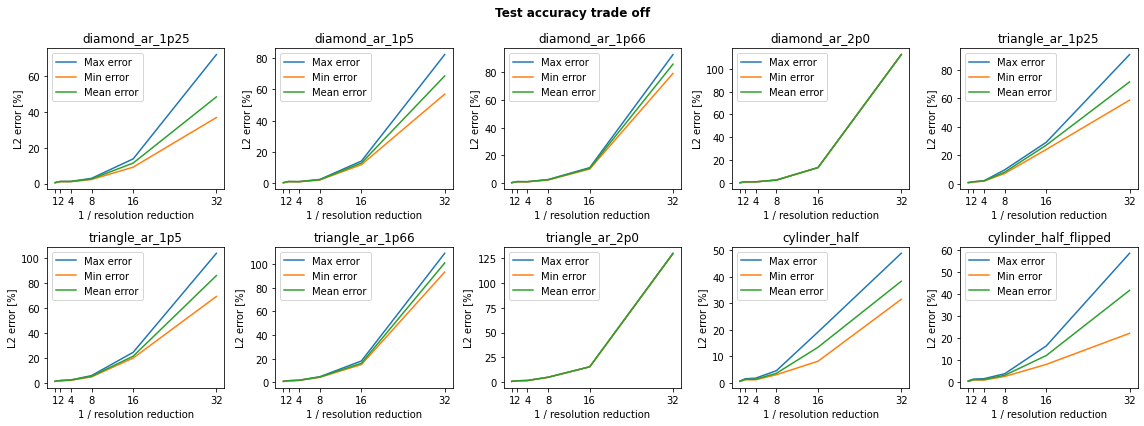

In [10]:
obstacles = ["diamond_ar_1p25",
             "diamond_ar_1p5",
             "diamond_ar_1p66",
             "diamond_ar_2p0",
             "triangle_ar_1p25",
             "triangle_ar_1p5",
             "triangle_ar_1p66",
             "triangle_ar_2p0",
             "cylinder_half",
             "cylinder_half_flipped"]

fig, axs = plt.subplots(2,5, figsize=(16,6), facecolor='white', edgecolor='k')
for idx, obstacle in enumerate(obstacles):
    row = idx // 5
    col = idx % 5
    i = (row, col)
    
    axs[i].plot(1/df_asc.down_res, df_asc[f'{obstacle}_max_l2_error']*100, label='Max error')
    axs[i].plot(1/df_asc.down_res, df_asc[f'{obstacle}_min_l2_error']*100, label='Min error')
    axs[i].plot(1/df_asc.down_res, df_asc[f'{obstacle}_mean_l2_error']*100, label='Mean error')
    
#     axs[i].plot(1/df_dsc.down_res, df_dsc[f'{obstacle}_max_l2_error']*100, label='Max error')
#     axs[i].plot(1/df_dsc.down_res, df_dsc[f'{obstacle}_min_l2_error']*100, label='Min error')
#     axs[i].plot(1/df_dsc.down_res, df_dsc[f'{obstacle}_mean_l2_error']*100, label='Mean error')

    axs[i].set_ylabel('L2 error [%]')
    axs[i].set_xlabel('1 / resolution reduction')
    axs[i].set_xticks(1/df_asc.down_res)
    axs[i].set_title(obstacle)
    axs[i].legend(loc='upper left')
fig.suptitle('Test accuracy trade off', fontweight='heavy')
fig.tight_layout()

plt.savefig('post_processing/test_accuracy_comparison.png', facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()

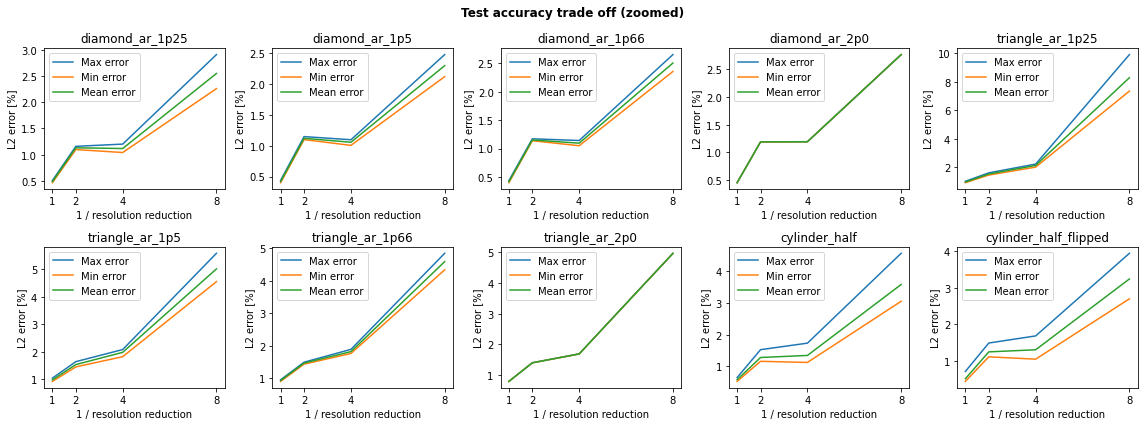

In [11]:
df_asc_zoomed = df_asc[:4]
df_dsc_zoomed = df_dsc[:4]

fig, axs = plt.subplots(2,5, figsize=(16,6), facecolor='white', edgecolor='k')
for idx, obstacle in enumerate(obstacles):
    row = idx // 5
    col = idx % 5
    i = (row, col)
    
    axs[i].plot(1/df_asc_zoomed.down_res, df_asc_zoomed[f'{obstacle}_max_l2_error']*100, label='Max error')
    axs[i].plot(1/df_asc_zoomed.down_res, df_asc_zoomed[f'{obstacle}_min_l2_error']*100, label='Min error')
    axs[i].plot(1/df_asc_zoomed.down_res, df_asc_zoomed[f'{obstacle}_mean_l2_error']*100, label='Mean error')
    
#     axs[i].plot(1/df_dsc_zoomed.down_res, df_dsc_zoomed[f'{obstacle}_max_l2_error']*100, label='Max error')
#     axs[i].plot(1/df_dsc_zoomed.down_res, df_dsc_zoomed[f'{obstacle}_min_l2_error']*100, label='Min error')
#     axs[i].plot(1/df_dsc_zoomed.down_res, df_dsc_zoomed[f'{obstacle}_mean_l2_error']*100, label='Mean error')

    axs[i].set_ylabel('L2 error [%]')
    axs[i].set_xlabel('1 / resolution reduction')
    axs[i].set_xticks(1/df_asc_zoomed.down_res)
    axs[i].set_title(obstacle)
    axs[i].legend(loc='upper left')
fig.suptitle('Test accuracy trade off (zoomed)', fontweight='heavy')
fig.tight_layout()

plt.savefig('post_processing/test_accuracy_comparison_zoomed.png', facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()

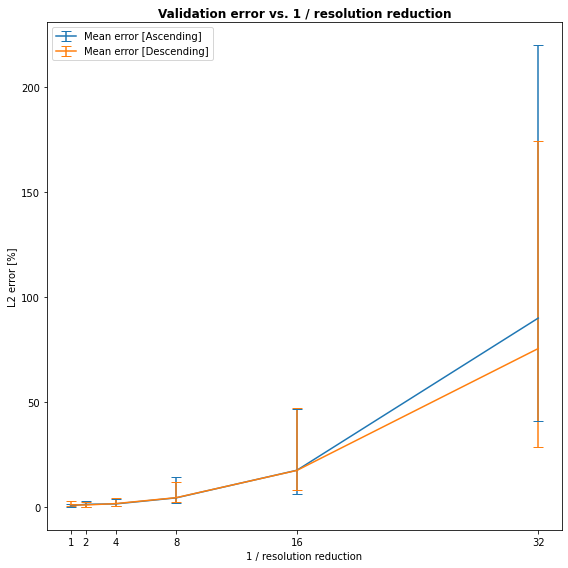

In [13]:
fig, axs = plt.subplots(1,1, figsize=(8,8), facecolor='white', edgecolor='k')

all_max = df_asc[[f'{obstacle}_max_l2_error' for obstacle in obstacles]].max(axis=1)
all_min = df_asc[[f'{obstacle}_max_l2_error' for obstacle in obstacles]].min(axis=1)
all_mean = df_asc[[f'{obstacle}_max_l2_error' for obstacle in obstacles]].mean(axis=1)
axs.errorbar(1/df_asc.down_res, all_mean*100, yerr=np.array([all_min, all_max])*100, capsize=5, label='Mean error [Ascending]')

all_max = df_dsc[[f'{obstacle}_max_l2_error' for obstacle in obstacles]].max(axis=1)
all_min = df_dsc[[f'{obstacle}_max_l2_error' for obstacle in obstacles]].min(axis=1)
all_mean = df_dsc[[f'{obstacle}_max_l2_error' for obstacle in obstacles]].mean(axis=1)
axs.errorbar(1/df_dsc.down_res, all_mean*100, yerr=np.array([all_min, all_max])*100, capsize=5, label='Mean error [Descending]')

axs.set_ylabel('L2 error [%]')
axs.set_xlabel('1 / resolution reduction')
axs.set_xticks(1/df_asc.down_res)
axs.set_title('Validation error vs. 1 / resolution reduction', fontweight='heavy')
axs.legend(loc='upper left')
# fig.suptitle('Prediction time trade off', fontweight='heavy')
fig.tight_layout()

plt.savefig('post_processing/train_val_accuracy_comparison.png', facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()


2.5884904861450195
2.6206345558166504
2.6176092624664307
2.618854761123657
2.6469645500183105
24.41783142089844


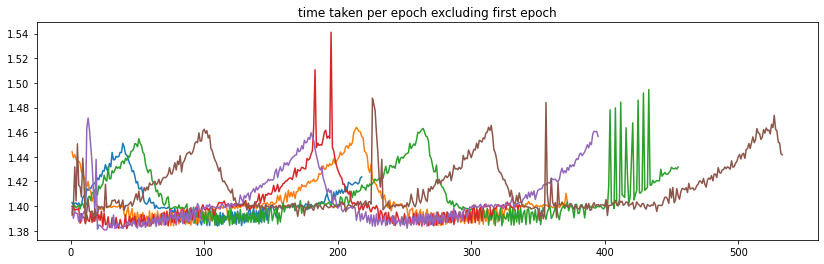

In [3]:
all_times = {}

plt.figure(figsize=(14,4))
for experiment_num in range(1, 7):
    df = pd.read_csv(f'experiment_{experiment_num}/training_epoch_data.csv')
    all_times[experiment_num] = df.times.to_numpy()
    plt.plot(df.times[1:], label=f'')
    print(df.times[0])
# print(all_times)
plt.title('time taken per epoch excluding first epoch')
plt.show()